In [2]:
import nltk


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shivi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [8]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [9]:

df = pd.read_csv('/Users/train.csv')

In [10]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [12]:
# printing random tweets 
print(df['tweet'].iloc[0],"\n")
print(df['tweet'].iloc[1],"\n")
print(df['tweet'].iloc[2],"\n")
print(df['tweet'].iloc[3],"\n")
print(df['tweet'].iloc[4],"\n")

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   

 factsguide: society now    #motivation 



In [13]:
#creating a function to process the data
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [14]:
df.tweet = df['tweet'].apply(data_processing)

In [15]:
df = df.drop_duplicates('tweet')

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shivi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [18]:
df['tweet'] = df['tweet'].apply(lambda x: lemmatizing(x))

In [379]:
 import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shivi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [380]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [381]:
df['tweet'] = df['tweet'].apply(lambda x: lemmatizing(x))

In [382]:
 import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shivi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [20]:
df['tweet'] = df['tweet'].apply(lambda x: lemmatizing(x))

In [21]:

print(df['tweet'].iloc[0],"\n")
print(df['tweet'].iloc[1],"\n")
print(df['tweet'].iloc[2],"\n")
print(df['tweet'].iloc[3],"\n")
print(df['tweet'].iloc[4],"\n")


user father dysfunctional selfish drags kids dysfunction run 

user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked 

bihday majesty 

model love u take u time ur 

factsguide society motivation 



In [22]:
df.shape

(29345, 3)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29345 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      29345 non-null  int64 
 1   label   29345 non-null  int64 
 2   tweet   29345 non-null  object
dtypes: int64(2), object(1)
memory usage: 917.0+ KB


In [24]:
df.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [25]:
df['label'].value_counts()

0    27352
1     1993
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

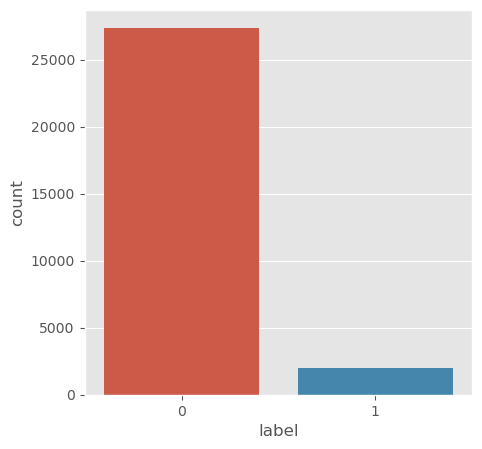

In [26]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

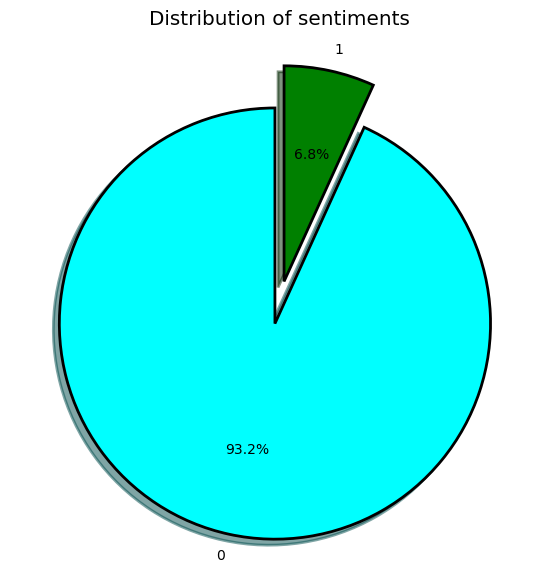

In [27]:
fig = plt.figure(figsize=(7,7))
colors = ("cyan", "green")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [28]:
non_hate_tweets = df[df.label == 0]
non_hate_tweets.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


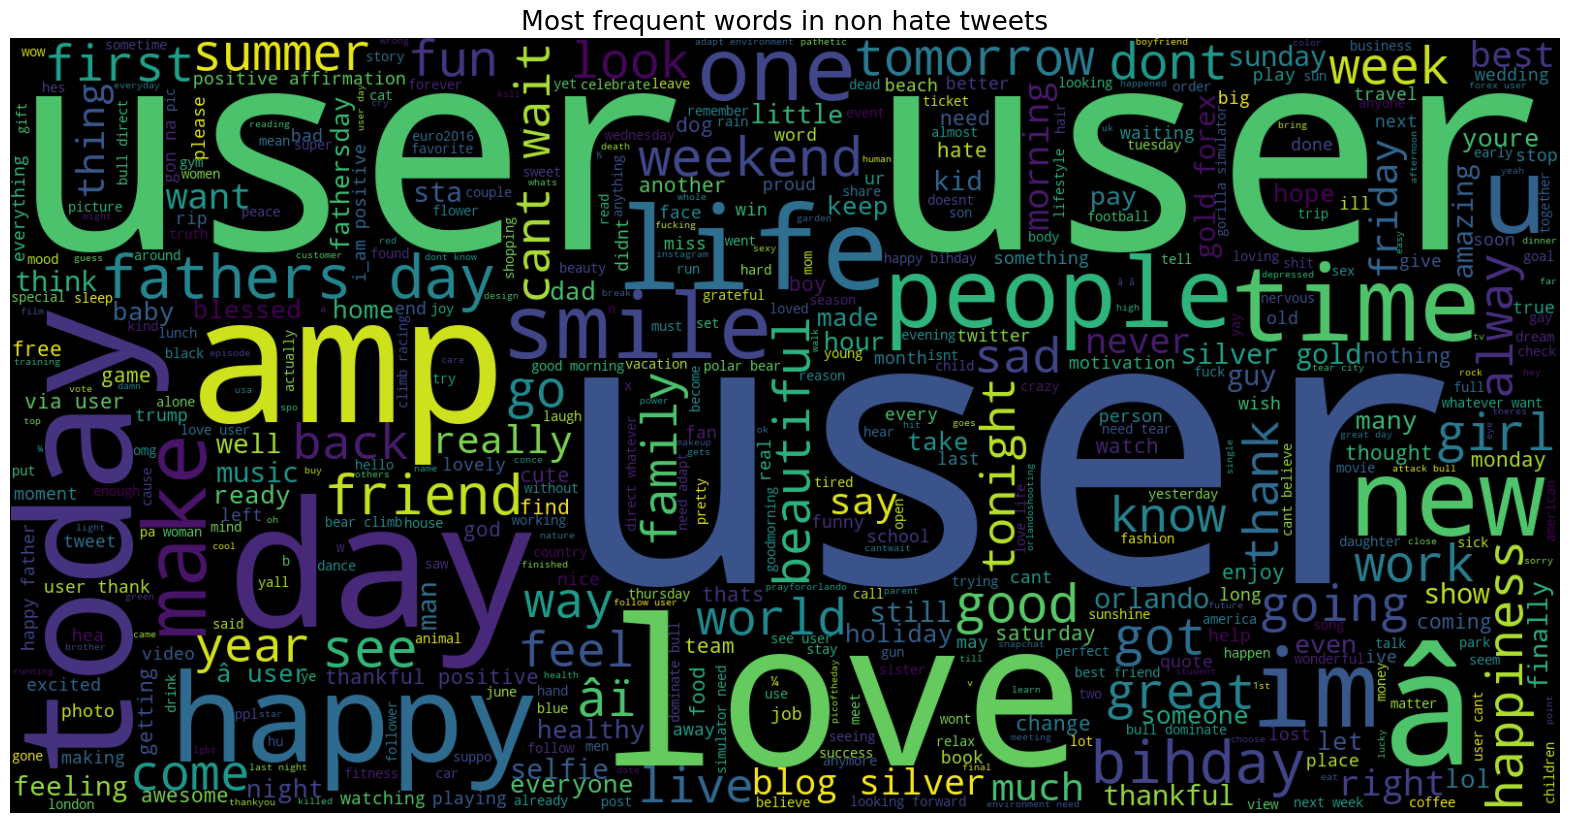

In [29]:
text = ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [33]:
neg_tweets = df[df.label == 1]
neg_tweets.head()

,id,label,tweet
13,14,1,user cnn calls michigan middle school build wa...
14,15,1,comment australia opkillingbay seashepherd hel...
17,18,1,retweet agree
23,24,1,user user lumpy says prove lumpy
34,35,1,unbelievable 21st century wed need something l...


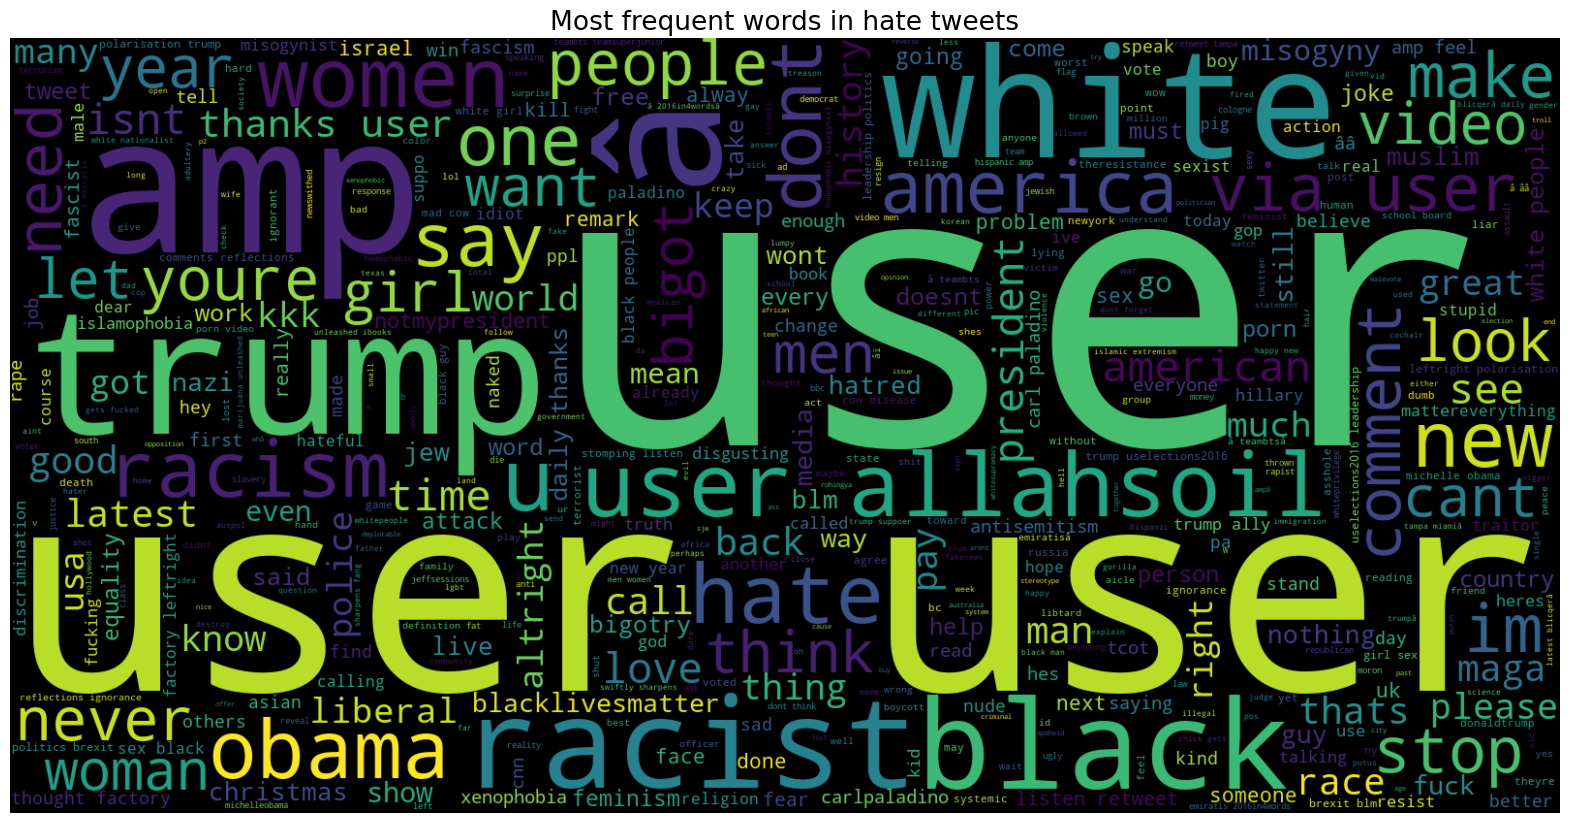

In [34]:
text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

In [35]:
df.drop(['id'],axis=1)

,label,tweet
0,0,user father dysfunctional selfish drags kids d...
1,0,user user thanks lyft credit cant use cause do...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation
...,...,...
31956,0,fishing tomorrow user carnt wait first time 2 ...
31957,0,ate user isz youuuâï
31958,0,see nina turner airwaves trying wrap mantle ge...
31959,0,listening sad songs monday morning otw work sad


In [36]:
dff = df.drop(['label'], axis = 1)

In [37]:
dff.head()

,id,tweet
0,1,user father dysfunctional selfish drags kids d...
1,2,user user thanks lyft credit cant use cause do...
2,3,bihday majesty
3,4,model love u take u time ur
4,5,factsguide society motivation


In [38]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(dff, list(df.label), test_size=0.1)

In [39]:
X_test.shape

(2935, 2)

In [40]:
X_temp.shape

(26410, 2)

In [41]:
len(y_test)

2935

In [42]:
X_temp['label'] = y_temp

In [43]:
X_temp.head()

,id,tweet,label
8169,8170,carlpaladino trump official underfire obama re...,1
21217,21218,chick gets fucked c thomas howell naked,1
28734,28735,always roaltafro,0
20321,20322,im seeing freakin user tomorrow last time saw ...,0
29102,29103,business villy wang tedinstitute,1


In [44]:
X_temp.label[3] 

0

In [45]:
type(X_temp)

pandas.core.frame.DataFrame

In [46]:
nonhate = X_temp[X_temp['label'] == 0]

In [47]:
nonhate.head()

,id,tweet,label
28734,28735,always roaltafro,0
20321,20322,im seeing freakin user tomorrow last time saw ...,0
19013,19014,notimpressed thirsty thursday childhood friend...,0
17464,17465,listen saturday brunch shaws crab house user r...,0
19382,19383,know acts like humans dont even shock anymore ...,0


In [48]:
nonhate.shape[0]

24596

In [49]:
hate = X_temp[X_temp.label == 1]

In [50]:
hate.shape[0]

1814

In [51]:
nonhatesample = nonhate.sample(n = hate.shape[0])
nonhatesample.head()

,id,tweet,label
25495,25496,officers salute last known 911 search dog head...,0
3212,3213,catnewhome stress lookingaround,0
20788,20789,first black president endorsed first women dem...,0
31528,31529,britney user love instamood cute igers sexyboy...,0
21433,21434,glamorousi_am positive affirmation,0


In [52]:
nonhatesample.shape

(1814, 3)

In [53]:
ds = pd.concat([hate, nonhatesample], axis = 0)

In [54]:
ds.tail()

,id,tweet,label
13138,13139,going major transition life seems point happy ...,0
26014,26015,user time get sta watching new season ointb im...,0
31843,31844,summer love stylemen style stylenanda styles i...,0
26902,26903,user user user user general election time hour...,0
21296,21297,yeah 5yrs best,0


In [55]:
ds.shape


(3628, 3)

In [56]:
ds.head()

,id,tweet,label
8169,8170,carlpaladino trump official underfire obama re...,1
21217,21218,chick gets fucked c thomas howell naked,1
29102,29103,business villy wang tedinstitute,1
22067,22068,racism america kill obama muslims welcome sign...,1
3577,3578,everything next 4 years neverump pussygrabberi...,1


In [57]:
ds_temp = ds

In [58]:
testdf = X_test
testdf['label'] = y_test
testdf.shape

(2935, 3)

In [59]:
ds = pd.concat([ds_temp, testdf], axis = 0)

In [60]:
ds.head()

,id,tweet,label
8169,8170,carlpaladino trump official underfire obama re...,1
21217,21218,chick gets fucked c thomas howell naked,1
29102,29103,business villy wang tedinstitute,1
22067,22068,racism america kill obama muslims welcome sign...,1
3577,3578,everything next 4 years neverump pussygrabberi...,1


In [61]:
ds.shape

(6563, 3)

In [62]:
testdf.head()

,id,tweet,label
14904,14905,defense rape culture looks like via user endra...,0
12784,12785,user user maddy thank much video music truly b...,0
16285,16286,âuser great news im amp bosas hooray theatre a...,0
21977,21978,tale photographing yellowstone photography,0
4161,4162,d1wvu hockey shoutout alumni greg scholtz 1998...,0


In [63]:
list(testdf.index)

[14904,
 12784,
 16285,
 21977,
 4161,
 19432,
 12223,
 11807,
 24865,
 20084,
 7321,
 11325,
 28094,
 17934,
 14804,
 2989,
 11043,
 21718,
 24193,
 31153,
 25294,
 974,
 8775,
 17965,
 10623,
 27243,
 18732,
 12047,
 12070,
 20470,
 3942,
 12010,
 19936,
 136,
 9277,
 3798,
 9520,
 12567,
 29387,
 19407,
 9030,
 10139,
 31418,
 3105,
 3305,
 23544,
 6003,
 26559,
 22618,
 11768,
 28361,
 20612,
 31382,
 22418,
 13101,
 13166,
 19964,
 25761,
 2910,
 10866,
 13678,
 30141,
 28125,
 19871,
 13664,
 10104,
 17532,
 3036,
 536,
 16967,
 17962,
 11687,
 16744,
 12900,
 7687,
 19194,
 28189,
 26602,
 2030,
 14296,
 12526,
 21201,
 24997,
 21184,
 12339,
 8053,
 23143,
 4522,
 13795,
 6933,
 19120,
 13428,
 19945,
 25689,
 4295,
 22030,
 7717,
 30365,
 2987,
 658,
 11157,
 16540,
 422,
 15234,
 211,
 11459,
 22670,
 3022,
 29592,
 8164,
 18242,
 24889,
 24450,
 14557,
 28573,
 31449,
 26423,
 4452,
 22389,
 20134,
 2607,
 18434,
 20352,
 12548,
 8675,
 23961,
 2273,
 10093,
 6421,
 2958,
 2

In [64]:
dss=ds.drop(['id'],axis=1)
dss

,tweet,label
8169,carlpaladino trump official underfire obama re...,1
21217,chick gets fucked c thomas howell naked,1
29102,business villy wang tedinstitute,1
22067,racism america kill obama muslims welcome sign...,1
3577,everything next 4 years neverump pussygrabberi...,1
...,...,...
31481,school days,0
9086,really happened thailands tiger temple user,0
26109,user others didnt win losers hate losers,0
25257,user user meet sebastian new kitten â kitten p...,0


In [65]:
corpus = []
for i in range(dss.shape[0]):
    corpus.append(dss.iloc[i][0])
    

In [66]:
corpus

['carlpaladino trump official underfire obama remarks',
 'chick gets fucked c thomas howell naked',
 'business villy wang tedinstitute',
 'racism america kill obama muslims welcome signs new mexico draw criticism ââ',
 'everything next 4 years neverump pussygrabberinchief idiocracy â',
 '2nites church service look user back ur bible 4maps biblical events took place jesus amp disciples r ppl color',
 'thought factory leftright polarisation trump uselections2016 leadership politics brexit blm gt6',
 'user obamalegacy showing negative stuff im confused obama potus donuldtrump',
 'conormcgregor runs mouth endlessly like rondarousey lost yet ppl take glee losing perhaps',
 'rise today stories police brutality user user user police',
 'user seriously considering performance inauguration lying misogynistâ',
 'user user many us find obamas policies repugnant make us youre liberal racecard exhausted',
 'sainsburys red stripe',
 'user dear democrats djt allowing islamicradicals 2 use americas fr

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [68]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)
df2


C:\Users\shivi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,001,01,0161,02,03,039,05,06,06202016,07000,...,ó¾¼¾ó¾ó¾,ó¾âºâº,ó¾ó¾,ó¾ó¾ó¾,ó¾ó¾ó¾ó¾ó¾,ø¹ùâ,øùøøøùù,øùùùùøøøøª,ùâ,ùùù
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
tdf = df2
tdf['labelxyz'] = list(dss.label)

In [71]:
tdf.tail()

,001,01,0161,02,03,039,05,06,06202016,07000,...,ó¾âºâº,ó¾ó¾,ó¾ó¾ó¾,ó¾ó¾ó¾ó¾ó¾,ø¹ùâ,øùøøøùù,øùùùùøøøøª,ùâ,ùùù,labelxyz
6558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [72]:
tdf_hate = tdf[tdf.labelxyz == 1]


In [73]:
tdf_hate.shape

(1993, 15851)

In [74]:
tdf_nonhate = tdf[tdf.labelxyz == 0]

In [75]:
tdf_nonhate.shape

(4570, 15851)

In [76]:
X_train_hate = tdf_hate.sample(frac=0.9, random_state=0)

In [77]:
X_test_hate = tdf_hate.drop(X_train_hate.index)

In [78]:
X_train_nonhate =  tdf_nonhate.sample(frac=0.406, random_state=0)

In [79]:
X_test_nonhate = tdf_nonhate.drop(X_train_nonhate.index)

In [80]:
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)

In [81]:
X_train = X_train_df.drop(['labelxyz'], axis = 1)

In [82]:
y_train = list(X_train_df.labelxyz)

In [83]:

X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)

In [84]:
X_test = X_test_df.drop(['labelxyz'], axis = 1)

In [85]:
y_test = list(X_test_df.labelxyz)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [87]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()


# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [88]:
from sklearn.metrics import accuracy_score
nav_clf = GaussianNB()
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
accuracy_score(y_test, predict_nav)

0.6379547014413178

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_nav)

array([[1684, 1031],
       [  24,  175]], dtype=int64)

In [90]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
accuracy_score(y_test, predict_log)

0.8575840768702814

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_log)


array([[2332,  383],
       [  32,  167]], dtype=int64)

In [92]:
print(classification_report(y_test, predict_log))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2715
           1       0.30      0.84      0.45       199

    accuracy                           0.86      2914
   macro avg       0.65      0.85      0.68      2914
weighted avg       0.94      0.86      0.89      2914



In [93]:
log_reg.fit(X_train, y_train)
#predict_log = log_reg.predict(X_test, threshold = 0.5)
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
#accuracy_score(y_test, predict_log)

In [94]:
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(y_test))

In [95]:
import matplotlib.pyplot as plt

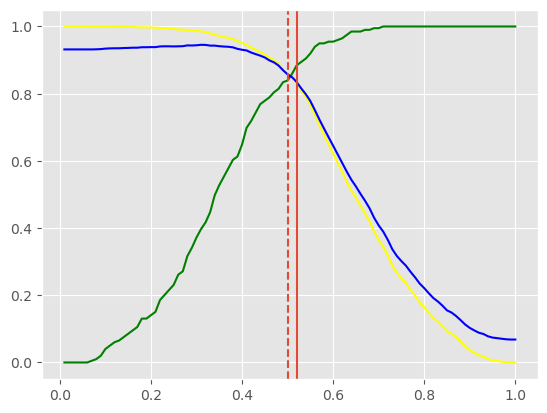

In [96]:
import numpy as np
thresh = list(np.linspace(0.01,1,100))
plt.plot(thresh,tp,color='yellow')
plt.plot(thresh, tn, color='green')
plt.plot(thresh, overall_acc, color='blue')
plt.axvline(0.52)
plt.axvline(0.5, linestyle='dashed')

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
accuracy_score(y_test, predict)

0.7566918325326012

In [99]:
confusion_matrix(y_test, predict)


array([[2026,  689],
       [  20,  179]], dtype=int64)

In [100]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85      2715
           1       0.21      0.90      0.34       199

    accuracy                           0.76      2914
   macro avg       0.60      0.82      0.59      2914
weighted avg       0.94      0.76      0.82      2914



In [102]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
accuracy_score(y_test, predict_dt)

0.6540837336993823

In [263]:
confusion_matrix(y_test, predict_dt)


array([[2029,  920],
       [  38,  186]], dtype=int64)

In [269]:
print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81      2949
           1       0.17      0.83      0.28       224

    accuracy                           0.70      3173
   macro avg       0.57      0.76      0.54      3173
weighted avg       0.92      0.70      0.77      3173



In [229]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
predict_grad = grad_clf.predict(X_test)
accuracy_score(y_test, predict_grad)

0.7752915222187204

In [264]:
confusion_matrix(y_test, predict_grad)


array([[2268,  681],
       [  49,  175]], dtype=int64)

In [232]:
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
p = []
for j in range(len(y_test)):
    p.append(1 - decisions[j][0])

In [233]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', roc_auc_score(y_test, p))
print('Naive Bayes Score: ', roc_auc_score(y_test, predict_nav))
print('Random Forest Score: ', roc_auc_score(y_test, predict))
print('Decision Tree Score: ', roc_auc_score(y_test, predict_dt))
print('Grad Boosting Score: ', roc_auc_score(y_test, predict_grad))

Logistic Regression Score:  0.8511465751102069
Naive Bayes Score:  0.7739397132199778
Random Forest Score:  0.807911580196677
Decision Tree Score:  0.7267551349125612
Grad Boosting Score:  0.7759818703676792


In [235]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, threshold = roc_curve(y_test,p)
nav_fpr, nav_tpr, threshold = roc_curve(y_test, predict_nav)
rand_fpr, rand_tpr, thresold = roc_curve(y_test, predict)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, predict_dt)
grad_fpr, grad_tpr, threshold = roc_curve(y_test, predict_grad)

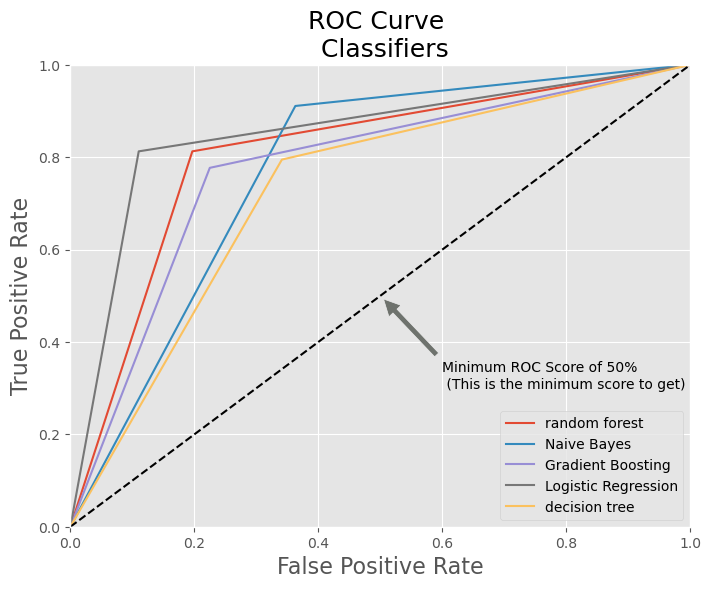

In [236]:
def graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(rand_fpr, rand_tpr, label='random forest')
    plt.plot(nav_fpr, nav_tpr, label='Naive Bayes')
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting')
    plt.plot(log_fpr, log_tpr, label='Logistic Regression')
    plt.plot(dt_fpr, dt_tpr, label='decision tree')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr)
plt.show()

In [ ]:
#Term Frequency - Inverse Document Frequency 

In [237]:
words = []
for k in range(len(corpus)):
    tweet_k = corpus[k].split(" ")
    for m in range(len(tweet_k)):
        words.append(tweet_k[m])
from collections import Counter
counter_obj = Counter(words)
top100 = counter_obj.most_common(1000)
top100words = []
for i in range(len(top100)):
    top100words.append(top100[i][0])

In [ ]:
tdftop = df2
lst3 = [value for value in list(tdftop.columns) if value in top100words] 
tdf100 = tdftop[lst3]
tdf100['labelxyz'] = list(ds.label)
tdf_hate = tdf100[tdf100.labelxyz == 1]
tdf_nonhate = tdf100[tdf100.labelxyz == 0]
X_train_hate = tdf_hate.sample(frac=0.9, random_state=0)
X_test_hate = tdf_hate.drop(X_train_hate.index)
X_train_nonhate =  tdf_nonhate.sample(frac=0.406, random_state=0)
X_test_nonhate = tdf_nonhate.drop(X_train_nonhate.index)
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
X_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)
X_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
log_reg =  LogisticRegression()

log_reg.fit(X_train, y_train)
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(y_test))

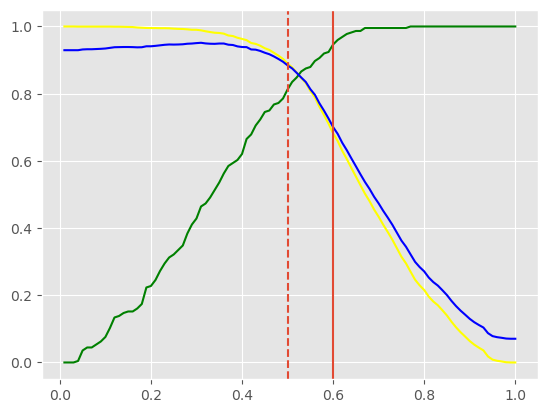

In [464]:

import matplotlib.pyplot as plt
import numpy as np
thresh = list(np.linspace(0.01,1,100))
plt.plot(thresh,tp,color='YELLOW')
plt.plot(thresh, tn, color='GREEN')
plt.plot(thresh, overall_acc, color='BLUE')
plt.axvline(0.6)
plt.axvline(0.5, linestyle='dashed')

In [ ]:
plt.show()

In [239]:
#other models
from sklearn.metrics import accuracy_score
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
print('naive bayes')
print(accuracy_score(y_test, predict_nav))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_nav))

rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
print('random forest')
print(accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
print('decision tree')
print(accuracy_score(y_test, predict_dt))
print(confusion_matrix(y_test, predict_nav))

from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
print('gradient boosting')
predict_grad = grad_clf.predict(X_test)
print(accuracy_score(y_test, predict_grad))
print(confusion_matrix(y_test, predict_grad))


naive bayes
0.6564765206429247
[[1879 1070]
 [  20  204]]
random forest
0.7954617081626221
[[2332  617]
 [  32  192]]
decision tree
0.6782225023636936
[[1879 1070]
 [  20  204]]
gradient boosting
0.7718247715096124
[[2275  674]
 [  50  174]]


In [240]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
accuracy_score(y_test, predict_log)

0.8843365899779388

In [260]:
print(confusion_matrix(y_test, predict_log))
print(classification_report(y_test, predict_log))

[[2630  319]
 [  36  188]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2949
           1       0.37      0.84      0.51       224

    accuracy                           0.89      3173
   macro avg       0.68      0.87      0.73      3173
weighted avg       0.94      0.89      0.91      3173



In [242]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', roc_auc_score(y_test, p))
print('Naive Bayes Score: ', roc_auc_score(y_test, predict_nav))
print('Random Forest Score: ', roc_auc_score(y_test, predict))
print('Decision Tree Score: ', roc_auc_score(y_test, predict_dt))
print('Grad Boosting Score: ', roc_auc_score(y_test, predict_grad))

Logistic Regression Score:  0.8511465751102069
Naive Bayes Score:  0.7739397132199778
Random Forest Score:  0.8239596957806521
Decision Tree Score:  0.7258233723296033
Grad Boosting Score:  0.7741168313714092


In [243]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, threshold = roc_curve(y_test,p)
nav_fpr, nav_tpr, threshold = roc_curve(y_test, predict_nav)
rand_fpr, rand_tpr, thresold = roc_curve(y_test, predict)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, predict_dt)
grad_fpr, grad_tpr, threshold = roc_curve(y_test, predict_grad)

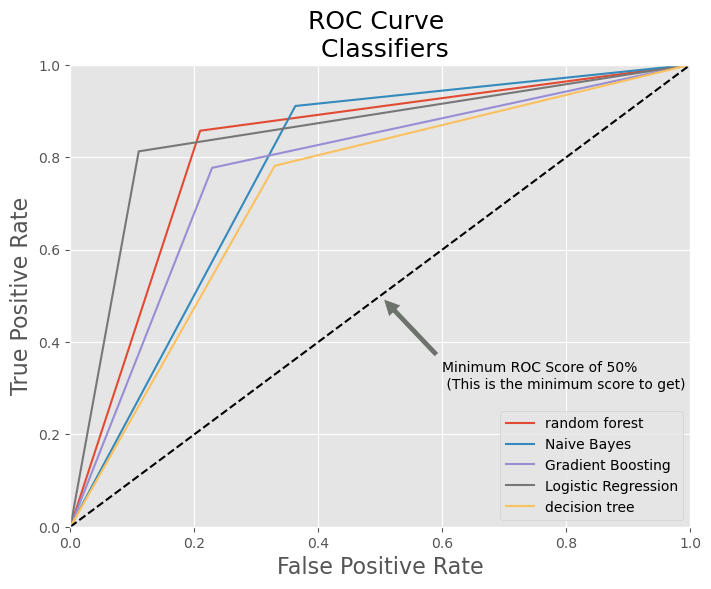

In [244]:
def graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(rand_fpr, rand_tpr, label='random forest')
    plt.plot(nav_fpr, nav_tpr, label='Naive Bayes')
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting')
    plt.plot(log_fpr, log_tpr, label='Logistic Regression')
    plt.plot(dt_fpr, dt_tpr, label='decision tree')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr)
plt.show()

In [ ]:
#Bag of Words

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus)
bow = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())


C:\Users\shivi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [105]:

bow['labelxyz'] = list(ds.label)

In [106]:
bow_hate = bow[bow.labelxyz == 1]
bow_nonhate = bow[bow.labelxyz == 0]
X_train_hate = bow_hate.sample(frac=0.9, random_state=0)
X_test_hate = bow_hate.drop(X_train_hate.index)
X_train_nonhate =  bow_nonhate.sample(frac=0.406, random_state=0)
X_test_nonhate = bow_nonhate.drop(X_train_nonhate.index)
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
X_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)
X_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

In [107]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [108]:
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(y_test))

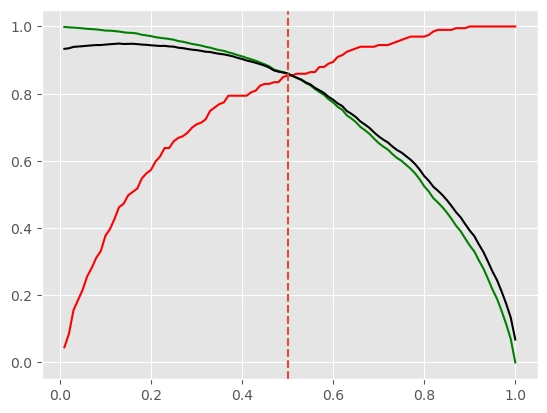

In [109]:
import numpy as np
thresh = list(np.linspace(0.01,1,100))
plt.plot(thresh,tp,color='GREEN')
plt.plot(thresh, tn, color='red')
plt.plot(thresh, overall_acc, color='black')
#plt.axvline(0.6)
plt.axvline(0.5, linestyle='dashed')

In [110]:
from sklearn.metrics import accuracy_score
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
print('naive bayes')
print(accuracy_score(y_test, predict_nav))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_nav))

rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
print('random forest')
print(accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
print('decision tree')
print(accuracy_score(y_test, predict_dt))
print(confusion_matrix(y_test, predict_nav))

from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
print('gradient boosting')
predict_grad = grad_clf.predict(X_test)
print(accuracy_score(y_test, predict_grad))
print(confusion_matrix(y_test, predict_grad))

naive bayes
0.6142759094028827
[[1610 1105]
 [  19  180]]
random forest
0.7680164722031572
[[2061  654]
 [  22  177]]
decision tree
0.6544269045984901
[[1610 1105]
 [  19  180]]
gradient boosting
0.7484557309540151
[[2020  695]
 [  38  161]]


In [111]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
accuracy_score(y_test, predict_log)

0.8599862731640356

In [112]:
print(confusion_matrix(y_test, predict_log))
print(classification_report(y_test, predict_log))

[[2336  379]
 [  29  170]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2715
           1       0.31      0.85      0.45       199

    accuracy                           0.86      2914
   macro avg       0.65      0.86      0.69      2914
weighted avg       0.94      0.86      0.89      2914



In [113]:
y_train[-1]+5

5

In [114]:
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
p = []
for j in range(len(y_test)):
    p.append(1 - decisions[j][0])
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', roc_auc_score(y_test, p))
print('Naive Bayes Score: ', roc_auc_score(y_test, predict_nav))
print('Random Forest Score: ', roc_auc_score(y_test, predict))
print('Decision Tree Score: ', roc_auc_score(y_test, predict_dt))
print('Grad Boosting Score: ', roc_auc_score(y_test, predict_grad))

Logistic Regression Score:  0.8573382566608365
Naive Bayes Score:  0.7487622273429764
Random Forest Score:  0.824281629140176
Decision Tree Score:  0.7446967804029355
Grad Boosting Score:  0.7765299795478311


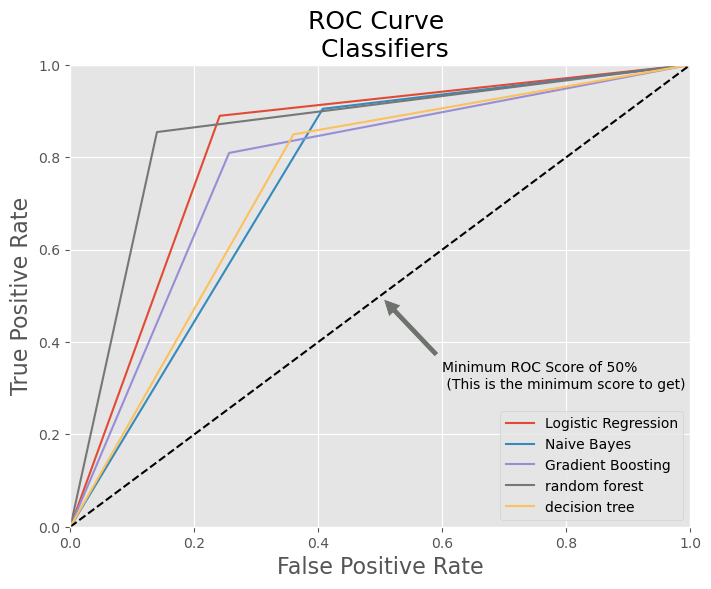

In [115]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, threshold = roc_curve(y_test,p)
nav_fpr, nav_tpr, threshold = roc_curve(y_test, predict_nav)
rand_fpr, rand_tpr, thresold = roc_curve(y_test, predict)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, predict_dt)
grad_fpr, grad_tpr, threshold = roc_curve(y_test, predict_grad)

#nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

def graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(rand_fpr, rand_tpr, label='Logistic Regression')
    plt.plot(nav_fpr, nav_tpr, label='Naive Bayes')
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting')
    plt.plot(log_fpr, log_tpr, label='random forest')
    plt.plot(dt_fpr, dt_tpr, label='decision tree')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr)
plt.show()